# JupyterLab: a Tensorflow example

Being the 'Hello World' of Deep Learning, the MNIST example of course suits a showcase of our JupyterLab perfectly. This notebook will quickly show you how to set up everything to be able to run such examples on our clusters, and then showcase some features of our Open Ondemand JupyterLab app.

## Setting up your own Python environment for JupyterLab

No matter if you are working in Machine Learning or not, if you are using Python, you will know that not all packages are readily available in a default installation of the language. That's why JupyterLab is using kernels in the background. Those kernels are in turn connected to conda environments. These environments are created by the user themselves, and packages can be added as the user likes.

These kernels can be created in just three steps (from a terminal):
1. create a conda environment with the correct packages, e.g.: `conda create -n tensorflow python tensorflow=2.9 ipykernel`
2. Activate your environment:  `source activate tensorflow`
3. Create the kernel: `python -m ipykernel install  --prefix=${VSC_HOME}/.local/ --name 'tensorflow'`

***And that's it! You now have your kernel available in JupyterLab:***

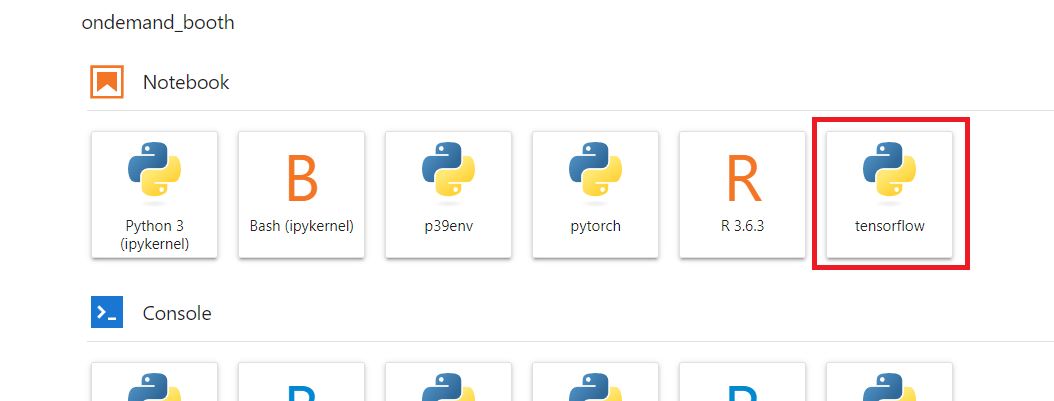

### Getting the data

The MNIST deep learning model (quite succesfully) tries to annotate hand-written digitsto their digital counterparts. Before we start, we should have a look at how the data looks. Of course, for that we need a dataset. Thankfully, most deep learning frameworks have the MNIST readily available. 

You can download the dataset in Keras/Tensorflow as follows:

In [13]:
import os
import pickle
import tensorflow as tf
import datetime

mnist_dataset = tf.keras.datasets.mnist.load_data()

Next to the data, we might need a plotting package, which was not included in the original conda environment. You can just execute conda commands in this notebook, for example installing new packages (this can take a while and generates a lot of output):

In [ ]:
conda install matplotlib

Now you can import your package.

In [2]:
import matplotlib.pyplot as plt

Now everything is ready to split the data in a train and test set, as well as normalize the data.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist_dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

Let's now plot one of the datapoints to see what such a handwritten digit looks like:

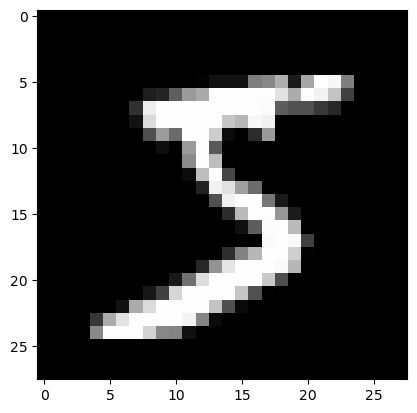

In [9]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

Now, it only rests us to define the model, the log function, and actually train and test the model. We also create some logs, so that we can analyse this data in Tensorboard.

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

2023-05-10 09:31:58.079031: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 09:31:58.574893: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7970 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe MIG 1g.10gb, pci bus id: 0000:17:00.0, compute capability: 8.0


In [14]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

log_dir = "tensorboard_logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


model.fit(x_train, 
          y_train, 
          epochs=5,
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0671 - accuracy: 0.9784 - val_loss: 0.0720 - val_accuracy: 0.9763
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0590 - accuracy: 0.9810 - val_loss: 0.0722 - val_accuracy: 0.9781
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0526 - accuracy: 0.9827 - val_loss: 0.0792 - val_accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0477 - accuracy: 0.9845 - val_loss: 0.0681 - val_accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0430 - accuracy: 0.9852 - val_loss: 0.0733 - val_accuracy: 0.9790
